## Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

The code on the cell above:
    
• We create a cities list to store city names.

• We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.

• We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 

We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

# Get the City Weather Data

MOdule 6.2.6

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
8. Parse the JSON weather data for the following:

    • City, country, and date
    
    • Latitude and longitude
    
    • Maximum temperature
    
    • Humidity
    
    • Cloudiness
    
    • Wind speed
    
    
9. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


## Import Dependencies, and Initialize an Empty List and Counters

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | orlik
Processing Record 4 of Set 1 | avera
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | cocoa beach
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | la orilla
Processing Record 15 of Set 1 | didao
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | samfya
Processing Record 20 of Set 1 | akdepe
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | cabinda
Processing R

Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 41 of Set 4 | panaba
Processing Record 42 of Set 4 | akhtubinsk
Processing Record 43 of Set 4 | coahuayana
Processing Record 44 of Set 4 | konispol
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | hohhot
Processing Record 47 of Set 4 | vao
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | loum
Processing Record 50 of Set 4 | aksu
Processing Record 1 of Set 5 | brae
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | lhokseumawe
Processing Record 5 of Set 5 | beberibe
Processing Record 6 of Set 5 | aksha
Processing Record 7 of Set 5 | turbat
Processing Record 8 of Set 5 | loikaw
Processing Record 9 of Set 5 | dunedin
Processing Record 10 of Set 5 | te anau
Processing Record 11 of Set 5 | saskylakh
Processing Record 12 of Set 5 | port hardy
P

Processing Record 32 of Set 8 | opuwo
Processing Record 33 of Set 8 | asau
Processing Record 34 of Set 8 | capim grosso
Processing Record 35 of Set 8 | sao jose da coroa grande
Processing Record 36 of Set 8 | yeppoon
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | miramar
Processing Record 39 of Set 8 | victor harbor
Processing Record 40 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 8 | antalaha
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | dzhebariki-khaya
Processing Record 46 of Set 8 | alekseyevsk
Processing Record 47 of Set 8 | los llanos de aridane
Processing Record 48 of Set 8 | caucaia
Processing Record 49 of Set 8 | smithers
Processing Record 50 of Set 8 | turayf
Processing Record 1 of Set 9 | abay
Processing Record 2 of Set 9 | port lincoln
Processing Record 3 of Set 9 | auki
Processing Record 4 of Set 9 | novyy svit
Process

Processing Record 23 of Set 12 | esperance
Processing Record 24 of Set 12 | sfantu gheorghe
Processing Record 25 of Set 12 | xinxiang
Processing Record 26 of Set 12 | talara
Processing Record 27 of Set 12 | cusuna
Processing Record 28 of Set 12 | cururupu
Processing Record 29 of Set 12 | chernyshevskiy
Processing Record 30 of Set 12 | khorramshahr
Processing Record 31 of Set 12 | vysokogornyy
Processing Record 32 of Set 12 | staroye drozhzhanoye
Processing Record 33 of Set 12 | buchanan
Processing Record 34 of Set 12 | deer lake
Processing Record 35 of Set 12 | capao da canoa
Processing Record 36 of Set 12 | manggar
Processing Record 37 of Set 12 | ordzhonikidze
Processing Record 38 of Set 12 | laguna
Processing Record 39 of Set 12 | baykit
Processing Record 40 of Set 12 | akcaabat
Processing Record 41 of Set 12 | bilecik
Processing Record 42 of Set 12 | moose factory
Processing Record 43 of Set 12 | ginir
Processing Record 44 of Set 12 | dargaville
Processing Record 45 of Set 12 | lin

# Create a DataFrame of City Weather Data

Module 6.2.7

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacific Grove,36.6177,-121.9166,52.56,67,0,3.00,US,2022-03-02 14:50:30
1,Rikitea,-23.1203,-134.9692,79.57,68,70,14.70,PF,2022-03-02 14:41:48
2,Orlik,52.5178,99.8250,6.03,96,100,1.83,RU,2022-03-02 14:50:31
3,Avera,33.1940,-82.5271,63.72,44,0,4.83,US,2022-03-02 14:50:31
4,Avarua,-21.2078,-159.7750,77.05,94,40,2.30,CK,2022-03-02 14:50:13
5,Hithadhoo,-0.6000,73.0833,84.85,67,100,13.42,MV,2022-03-02 14:50:32
6,Cherskiy,68.7500,161.3000,-22.95,100,71,2.62,RU,2022-03-02 14:44:57
7,Luderitz,-26.6481,15.1594,71.46,70,2,16.58,NA,2022-03-02 14:50:32
8,Cocoa Beach,28.3200,-80.6076,72.09,74,0,10.36,US,2022-03-02 14:49:45
9,Kapaa,22.0752,-159.3190,69.78,78,20,6.91,US,2022-03-02 14:43:35


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2022-03-02 14:50:30,36.6177,-121.9166,52.56,67,0,3.00
1,Rikitea,PF,2022-03-02 14:41:48,-23.1203,-134.9692,79.57,68,70,14.70
2,Orlik,RU,2022-03-02 14:50:31,52.5178,99.8250,6.03,96,100,1.83
3,Avera,US,2022-03-02 14:50:31,33.1940,-82.5271,63.72,44,0,4.83
4,Avarua,CK,2022-03-02 14:50:13,-21.2078,-159.7750,77.05,94,40,2.30
5,Hithadhoo,MV,2022-03-02 14:50:32,-0.6000,73.0833,84.85,67,100,13.42
6,Cherskiy,RU,2022-03-02 14:44:57,68.7500,161.3000,-22.95,100,71,2.62
7,Luderitz,NA,2022-03-02 14:50:32,-26.6481,15.1594,71.46,70,2,16.58
8,Cocoa Beach,US,2022-03-02 14:49:45,28.3200,-80.6076,72.09,74,0,10.36
9,Kapaa,US,2022-03-02 14:43:35,22.0752,-159.3190,69.78,78,20,6.91


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature
Module 6.3.1 

## Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Plot Latitude vs. Max Temperature

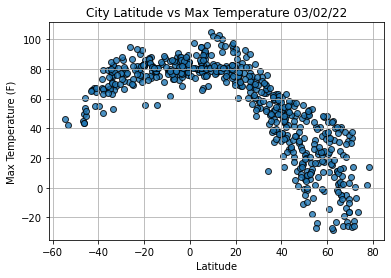

In [15]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

# Plot Latitude vs. Humidity

Module 6.3.2

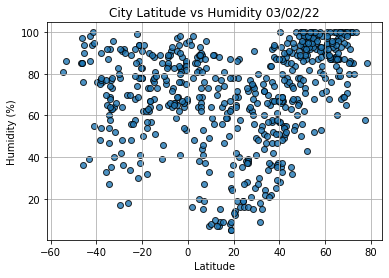

In [16]:
# Import time module
import time
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

# Plot Latitude vs. Cloudiness

Module 6.3.3

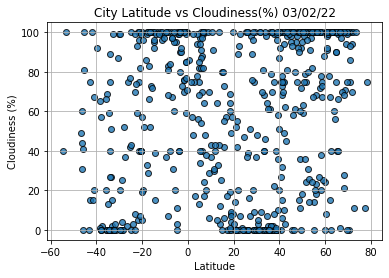

In [17]:
# Import time module
import time
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness(%) "+ time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

# Plot Latitude vs. Wind Speed
Module 6.3.4

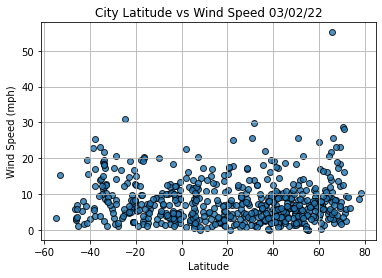

In [18]:
# Import time module
import time
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

## Create a Linear Regression Function

Module 6.4.2

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2022-03-02 14:50:34
Lat                       59.7035
Lng                       30.7861
Max Temp                    36.88
Humidity                       93
Cloudiness                     24
Wind Speed                   4.99
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
575    False
576    False
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacific Grove,US,2022-03-02 14:50:30,36.6177,-121.9166,52.56,67,0,3.00
2,Orlik,RU,2022-03-02 14:50:31,52.5178,99.8250,6.03,96,100,1.83
3,Avera,US,2022-03-02 14:50:31,33.1940,-82.5271,63.72,44,0,4.83
6,Cherskiy,RU,2022-03-02 14:44:57,68.7500,161.3000,-22.95,100,71,2.62
8,Cocoa Beach,US,2022-03-02 14:49:45,28.3200,-80.6076,72.09,74,0,10.36


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

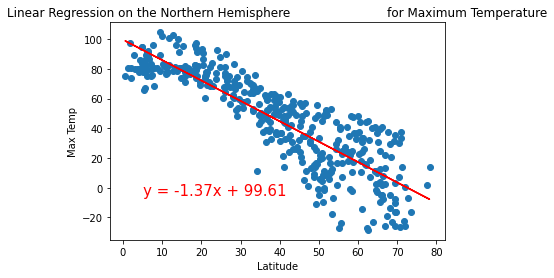

In [36]:
# Linear regression on the Northern Hemisphere for Maximun Temp.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,-5))

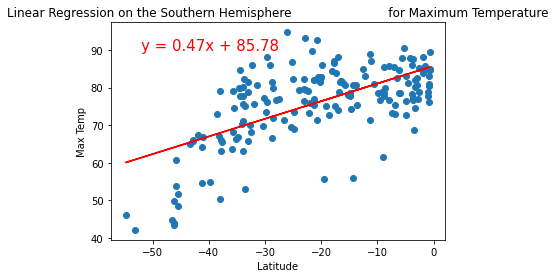

In [38]:
# Linear regression on the Southern Hemisphere for Maximun Temp.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-52,90))

## Find the Correlation Between Latitude and Percent Humidity

Module 6.4.3

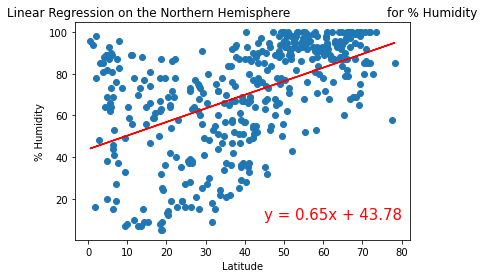

In [48]:
# Linear regression on the Northern Hemisphere for % Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

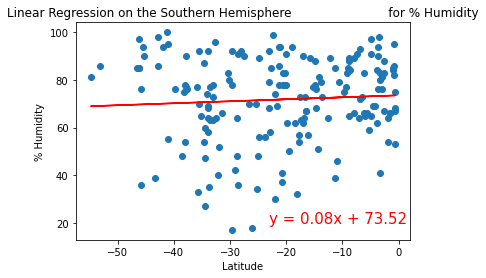

In [46]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,20))

### Find the Correlation Between Latitude and Percent Cloudiness
Module 6.4.4

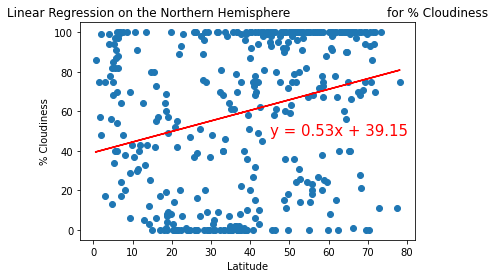

In [51]:
# Linear regression on the Northern Hemisphere for % Cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,48))

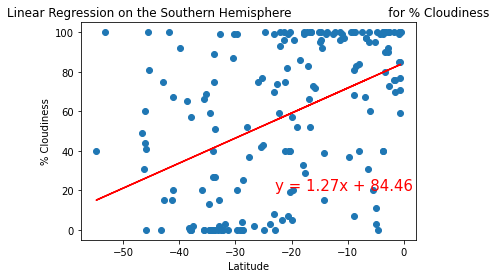

In [52]:
# Linear regression on the Southern Hemisphere for % Cloudiness.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-23,20))

### Find the Correlation Between Latitude and Wind Speed

Module 6.4.5

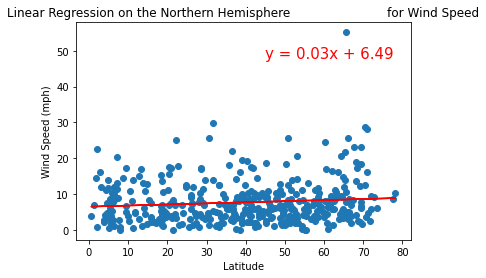

In [53]:
# Linear regression on the Northern Hemisphere for Wind Speed.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(45,48))

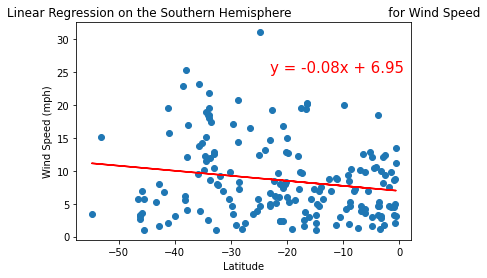

In [55]:
# Linear regression on the Southern Hemisphere for Wind Speed.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-23,25))